In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import zeros_like
from seaborn import distplot
from tqdm import tqdm
from math import floor
import cv2


In [6]:
def plot_hist(input_file,input_image,output_image,window_x,threshold):
    """
    input : input_file_path, input_image, output_image,window_size, histogram threshold
    output : saves the histograms for both the images for comparison
    dependencies : seaborn, numpy, matplotlib
    """
    name = input_file.split(".")[2]
    plt.figure()
    plt.title("Normalized Histogram Plots for Images")
    ax = distplot(input_image,color='r',label ="Input Histogram",hist_kws={"alpha": 0.3, "linewidth": 1.5},bins=256,hist=False)
    ax = distplot(output_image,color="b",label ="CLAHE Histogram",hist_kws={"alpha": 0.3,"linewidth": 1.5},bins=256,hist=False)
    l1 = ax.lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    ax.fill_between(x1,y1, color="red", alpha=0.3)
    l2 = ax.lines[1]
    x2 = l2.get_xydata()[:,0]
    y2 = l2.get_xydata()[:,1]
    ax.fill_between(x2,y2, color="blue", alpha=0.3)
    plt.legend()
    plt.savefig(".."+name+"CLAHEHistogram_"+str(window_x*2)+"_"+str(threshold)+".png",bbox_inches="tight",pad=-1)
    
def imhist(input_array):
    m, n = input_array.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[int(input_array[i, j])]+=1
    return np.array(h)/(m*n)

def calcCLAHEVal(input_array,th):
    r,c = input_array.shape
    H = imhist(input_array)
    C = zeros_like(H)
    for i in range(256):
        if H[i] > th:
            H[i] = th
    contrastArea = 1 - sum(H)
    height = contrastArea/256
    H = H + height
    C[0] = H[0]
    
    for i in range(1,256):
        C[i] = C[i-1] + (H[i])

    return C

def myCLAHE(input_file,window_x,window_y,threshold,cmap):
    name = input_file.split(".")[2]
    input_image = cv2.imread(input_file)
    output_image = np.zeros_like(input_image)
    d=1
    if len(input_image.shape)<3:
        r,c = input_image.shape
    else:
        r,c,d = input_image.shape

    
    if d==1:
        new_image = input_image
        
        for i in tqdm(range(r)):
            for j in range(c):
                min_x = max(0,i-window_x)
                min_y = max(0,j-window_y)
                max_x = min(r,i+window_x)
                max_y = min(c,j+window_y)
                
                window_image = input_image[min_x:max_x,min_y:max_y]
                if new_image[i,j]!=0:
                    x = calcCLAHEVal(window_image,threshold)
                    output_image[i,j] = x[int(new_image[i,j])]*255
        
        plot_hist(input_file,input_image,output_image,window_x,threshold)
                
    else:
        output_hsv = np.zeros_like(input_image)
        input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
        hsv_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV)
        h,s,v = cv2.split(hsv_image)

        out_v = v.copy()
        
        for i in tqdm(range(r)):
            for j in range(c):
                min_x = max(0,i-window_x)
                min_y = max(0,j-window_y)
                max_x = min(r,i+window_x)
                max_y = min(c,j+window_y)
                
                window_image = v[min_x:max_x,min_y:max_y]
                if out_v[i,j]!=0:
                    x = calcCLAHEVal(window_image,threshold)
                    out_v[i,j] = x[int(v[i,j])]*255
                    
        plot_hist(input_file,v,out_v,window_x,threshold)

        output_hsv[:,:,0] = h
        output_hsv[:,:,1] = s
        output_hsv[:,:,2] = out_v
            
        output_image = cv2.cvtColor(output_hsv,cv2.COLOR_HSV2RGB)
                    
    fig,axes = plt.subplots(1,2, constrained_layout=True)
    axes[0].imshow(input_image,cmap=cmap)
    axes[0].axis("on")
    axes[0].set_title("Original Image")
    im = axes[1].imshow(output_image,cmap=cmap)
    axes[1].axis("on")
    axes[1].set_title("CLAHE Image")
    cbar = fig.colorbar(im,ax=axes.ravel().tolist(),shrink=0.45)
    
    plt.savefig(".."+name+"CLAHEcombined_"+str(window_x*2)+"_"+str(threshold)+".png",bbox_inches="tight",pad=-1)

    plt.imsave(".." + name+"CLAHE"+str(window_x*2)+"_"+str(threshold)+".png",output_image,cmap=cmap)

100%|██████████| 512/512 [01:21<00:00,  6.30it/s]


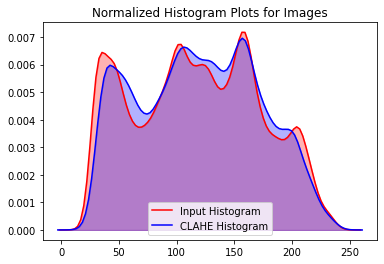

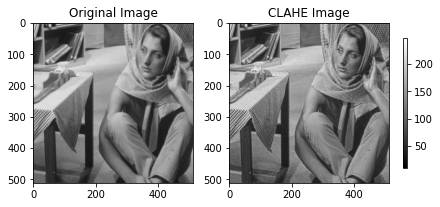

<Figure size 432x288 with 0 Axes>

In [7]:
input_file = "../data/barbara.png"
myCLAHE(input_file,4,4,0.005,"gray")

100%|██████████| 546/546 [10:19<00:00,  1.13s/it]


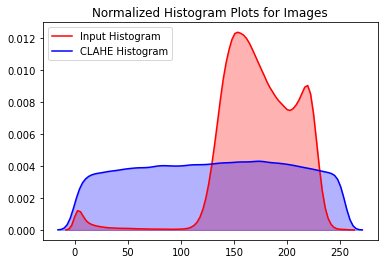

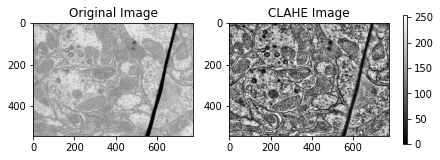

<Figure size 432x288 with 0 Axes>

In [8]:
input_file = "../data/TEM.png"
myCLAHE(input_file,32,32,0.03,"gray")

In [11]:
input_file = "../data/church.png"
myCLAHE(input_file,64,64,0.015,"gray")

  0%|          | 2/1200 [00:16<2:43:26,  8.19s/it]


KeyboardInterrupt: 

100%|██████████| 348/348 [02:49<00:00,  2.05it/s]


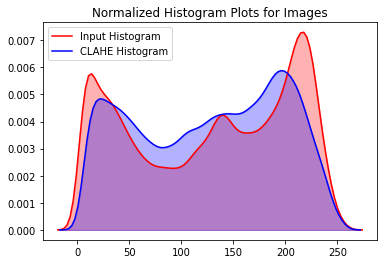

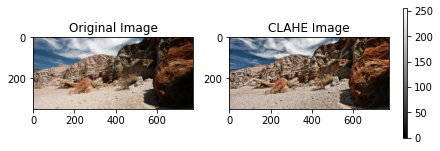

<Figure size 432x288 with 0 Axes>

In [10]:
input_file = "../data/canyon.png"
myCLAHE(input_file,16,16,0.005,"gray")

100%|██████████| 1024/1024 [06:26<00:00,  2.65it/s]


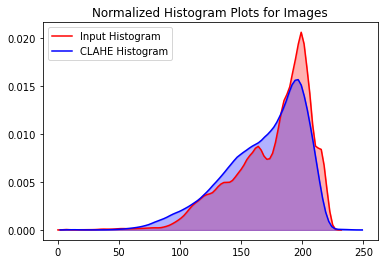

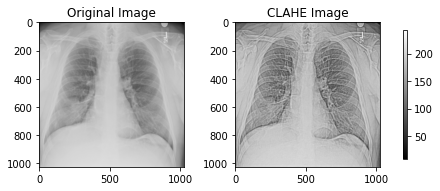

<Figure size 432x288 with 0 Axes>

In [9]:
input_file = "../data/chestXray.png"
myCLAHE(input_file,8,8,0.015,"gray")